[Reference](https://medium.com/@saheli_18616/time-series-forcasting-using-prophet-aa57530b0693)

In [2]:
pip install prophet

     |████████████████████████████████| 65 kB 2.0 MB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639593 sha256=cf5c7cead132dcb1d637001c4cf882a481edd9935c7018772e2cfb55e5a3da99
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:
import pandas as pd
from datetime import datetime
from prophet import Prophet
import matplotlib.pyplot as plt

In [4]:
# Read the data
df = pd.read_csv("https://raw.githubusercontent.com/SaheliDe/Time-Series-Modelling-with-prophet/main/Binance%20Coin%20-%20Historic%20data.csv")
df['Date']= pd.to_datetime(df['Date'])

df = df[(df["Date"].dt.year == 2021)]
df.set_index("Date", inplace=True)
df=df.sort_index()

# Set-up prophet model
df_prophet = pd.DataFrame()
df_prophet['y'] = df['Price(in dollars)']
df_prophet['Open'] = df['Open']
df_prophet['High'] = df['High']
df_prophet['Low'] = df['Low']
df_prophet['Change%'] = df['Change%']
df_prophet['ds'] = df.index

#Slice train and test set
df_train= df_prophet.head(180).copy()
df_test= df_prophet.tail(27).copy()

m = Prophet()
# m = Prophet(weekly_seasonality=False) # Remove weekly seasonality
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_regressor('Open')
# m.add_regressor('High')
# m.add_regressor('Low')
# m.add_regressor('Change%')

#Train the model on training data
m.fit(df_train)

#Test the model on test data
forecast = m.predict(df_test.drop(columns="y"))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0, 0.5, 'Average Price of BNB coin')

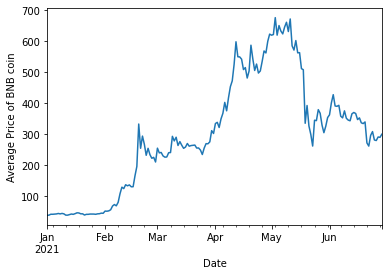

In [5]:
df_train['y'].plot()
plt.ylabel("Average Price of BNB coin")

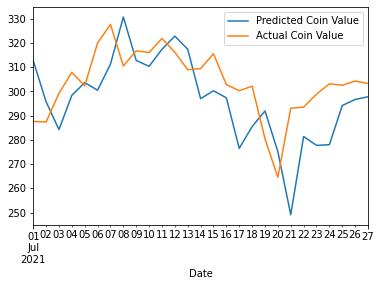

In [6]:
#Visualization
# Save the Dataframe
output_df=pd.DataFrame(data=forecast['yhat'].values, index=df_test.index, columns=['Predicted Coin Value'])
output_df['Actual Coin Value']= df_test['y']

output_df.plot()